In [4]:
import pandas as pd

# Load dataset
file_path = "benchmark_results.csv"
df = pd.read_csv(file_path)
df.head()


,Test,Elements,FilterType,Size(Bytes),FalsePositiveRate,Memory(KB),Time(ms),CompressionRatio
0,HashTest,10000,SimpleHash-Full,72566,0.005,21283,10,6.057
1,HashTest,10000,SimpleHash-Delta,8678,0.005,21437,3,0.724
2,HashTest,10000,SimpleHash-CBF,20138,0.002,17215,4,0.105
3,HashTest,20000,SimpleHash-Full,143868,0.001,16707,6,6.004
4,HashTest,20000,SimpleHash-Delta,17572,0.001,17143,2,0.733


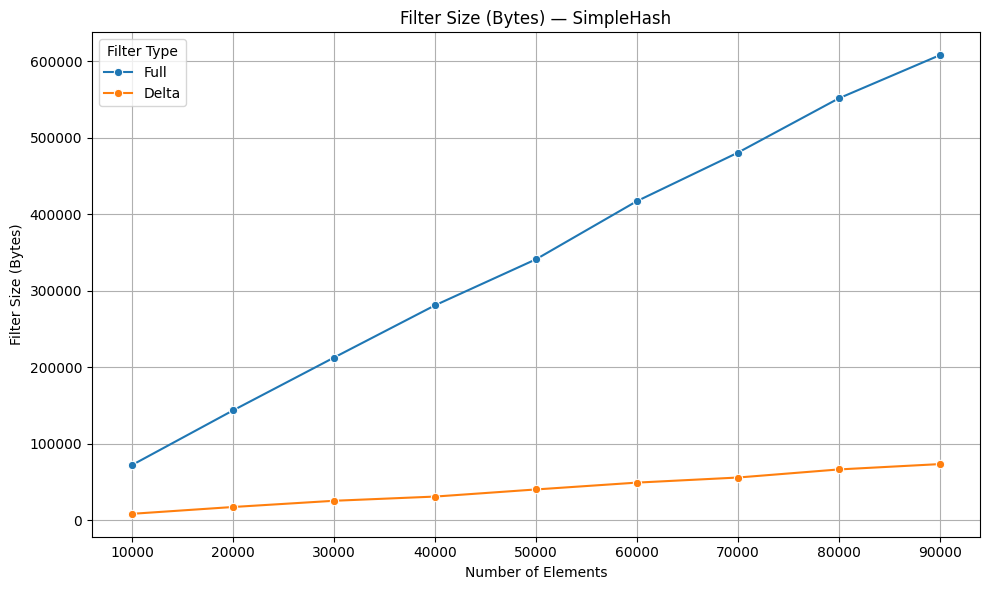

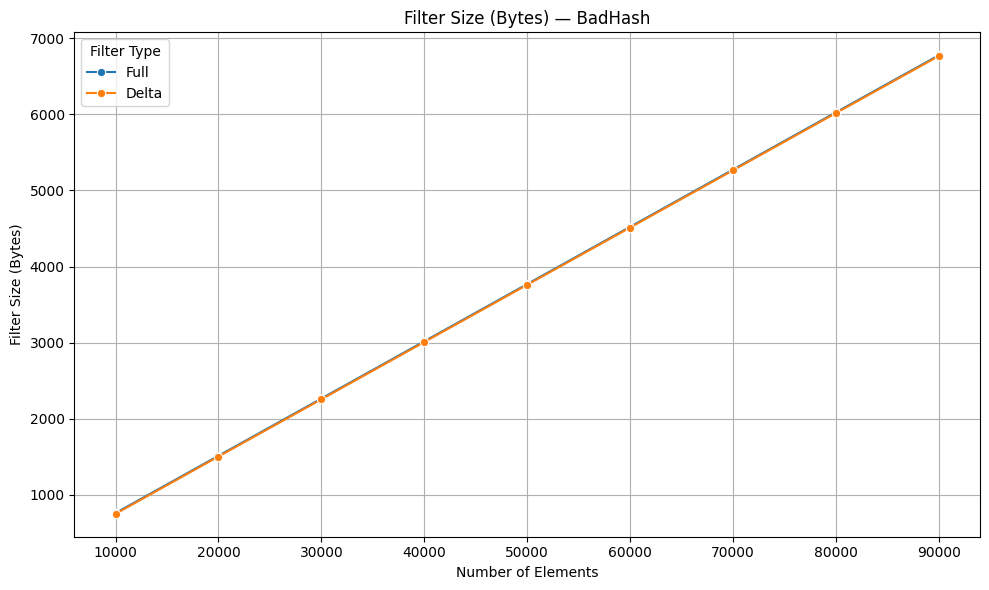

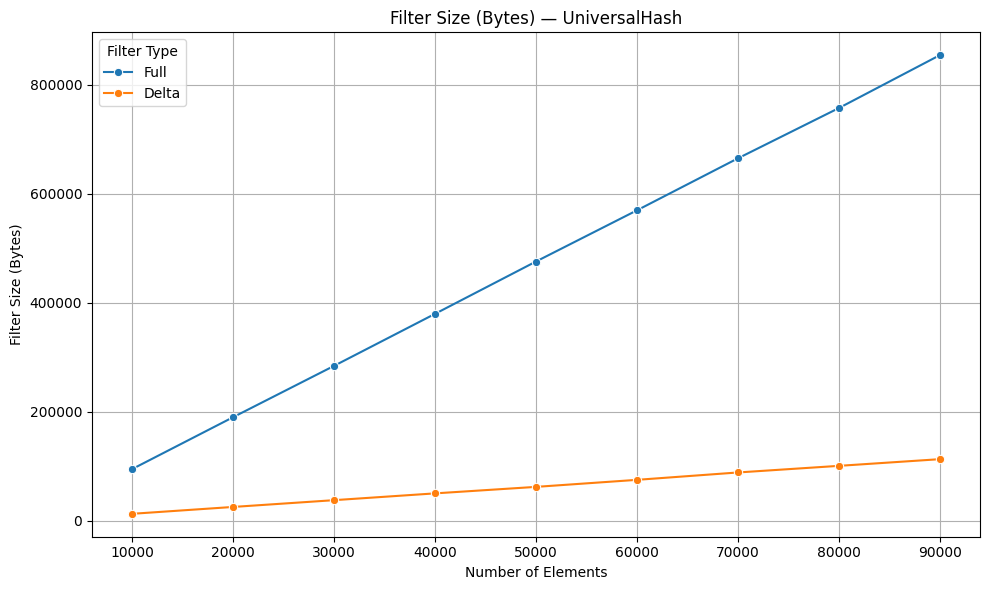

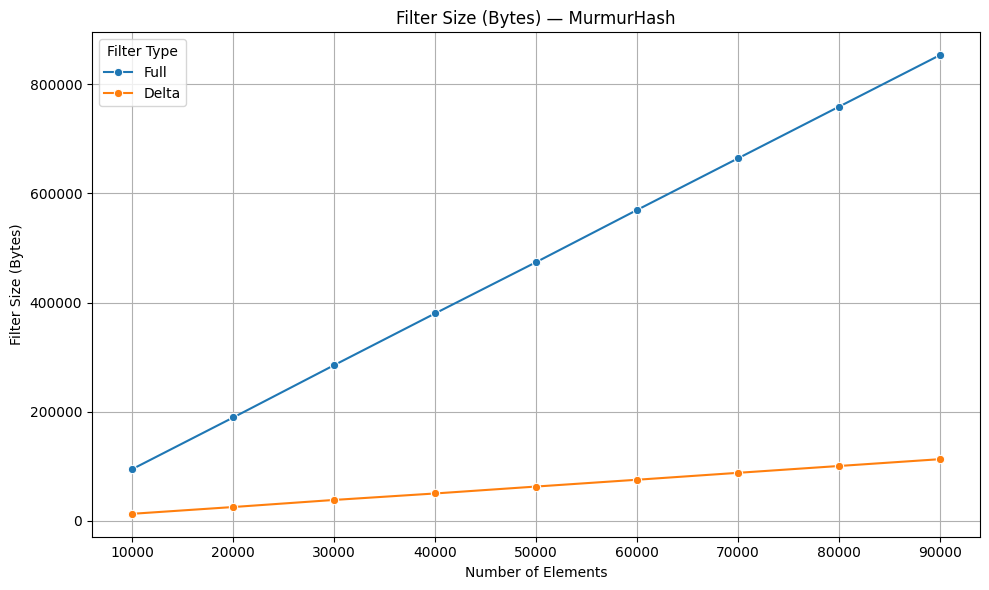

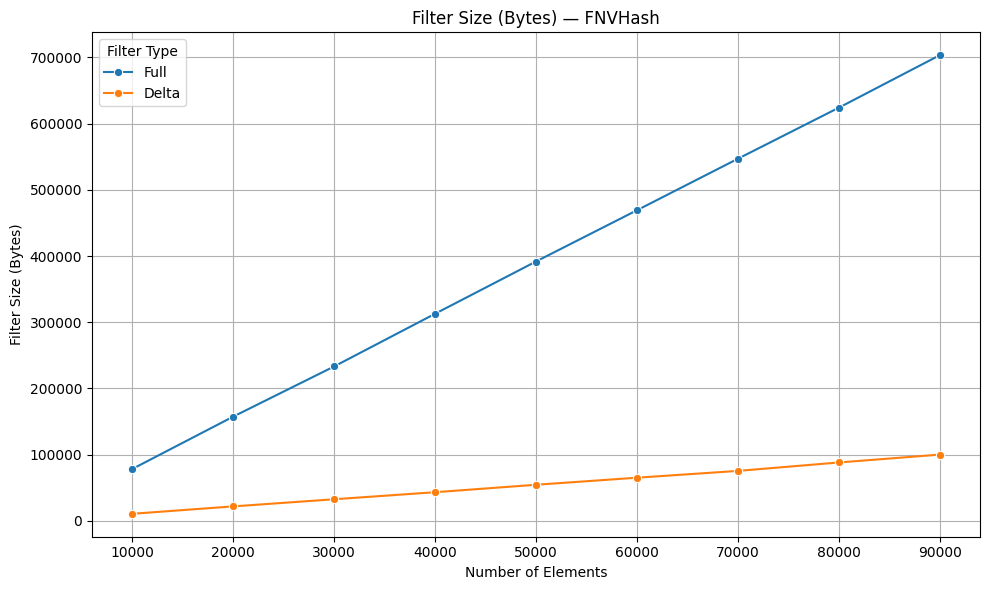

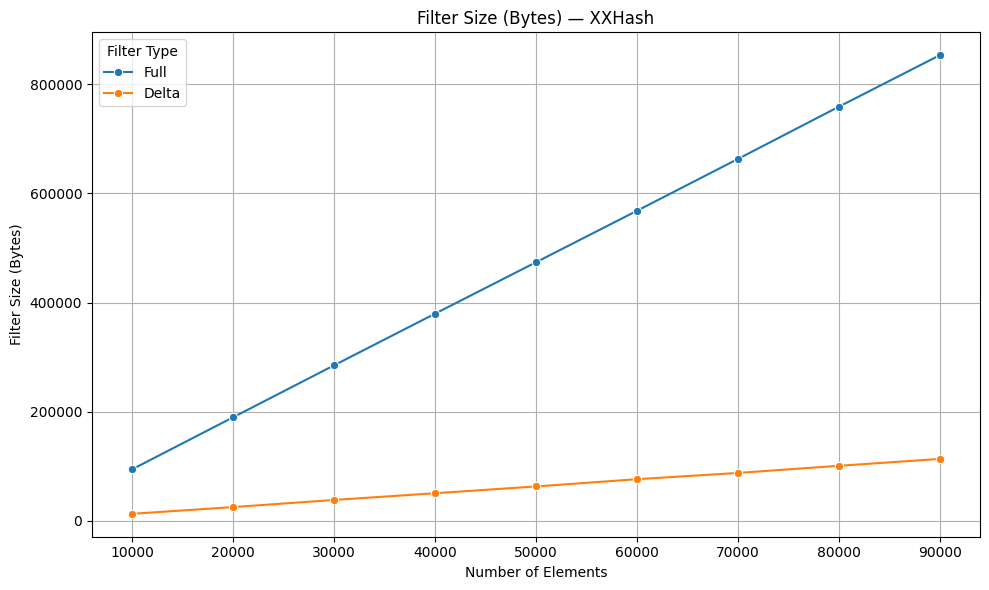

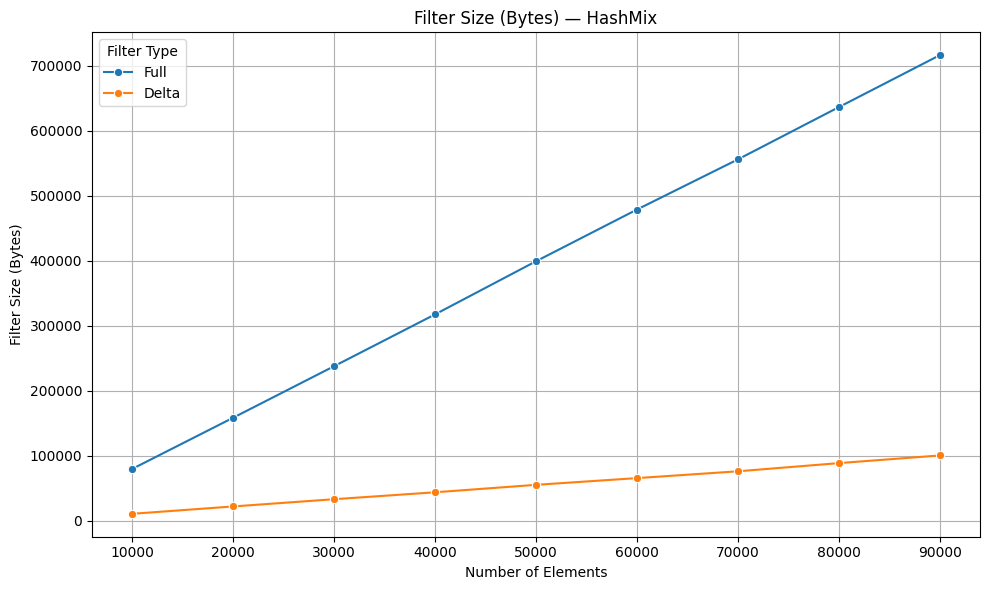

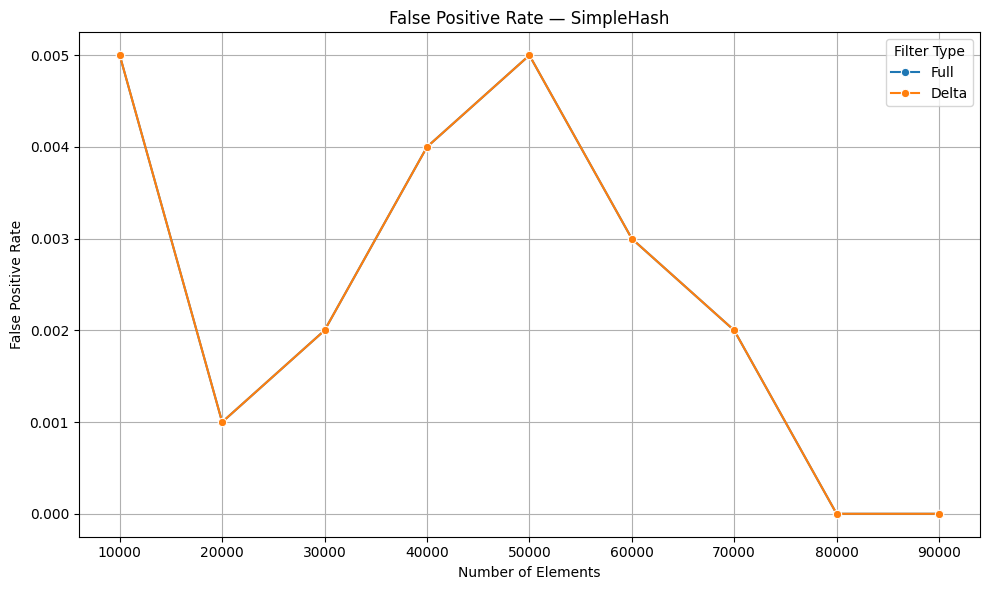

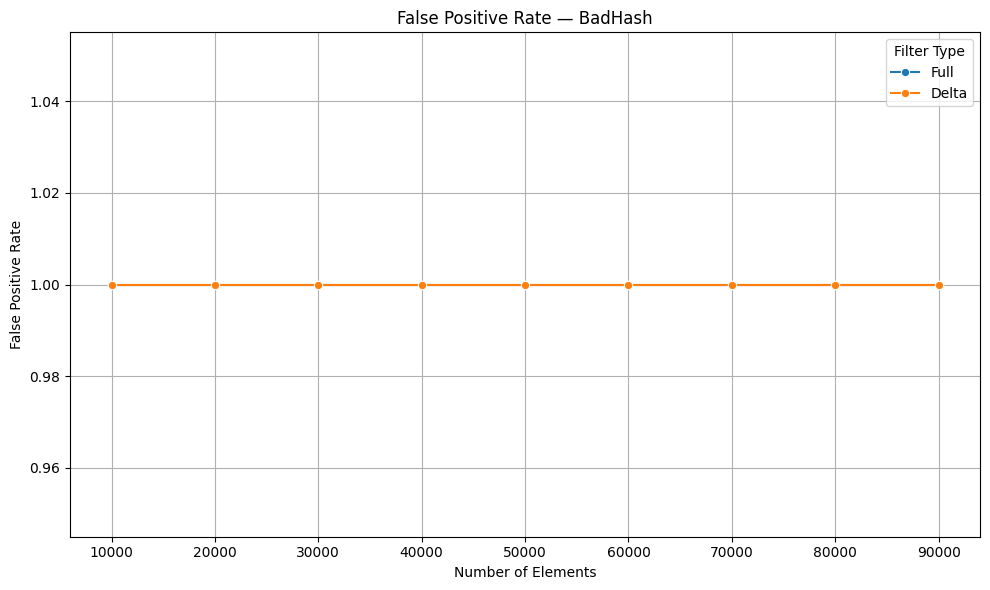

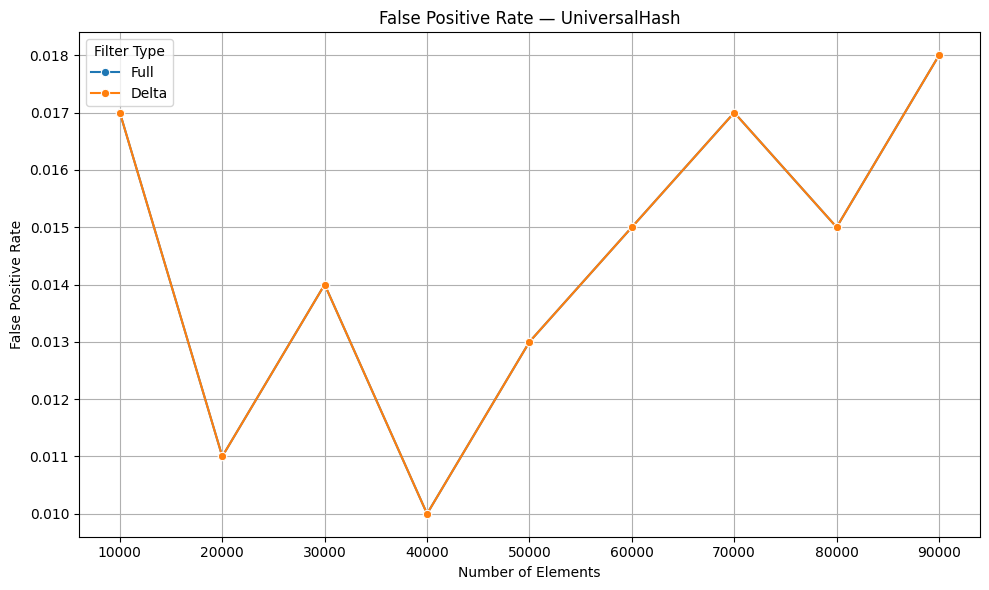

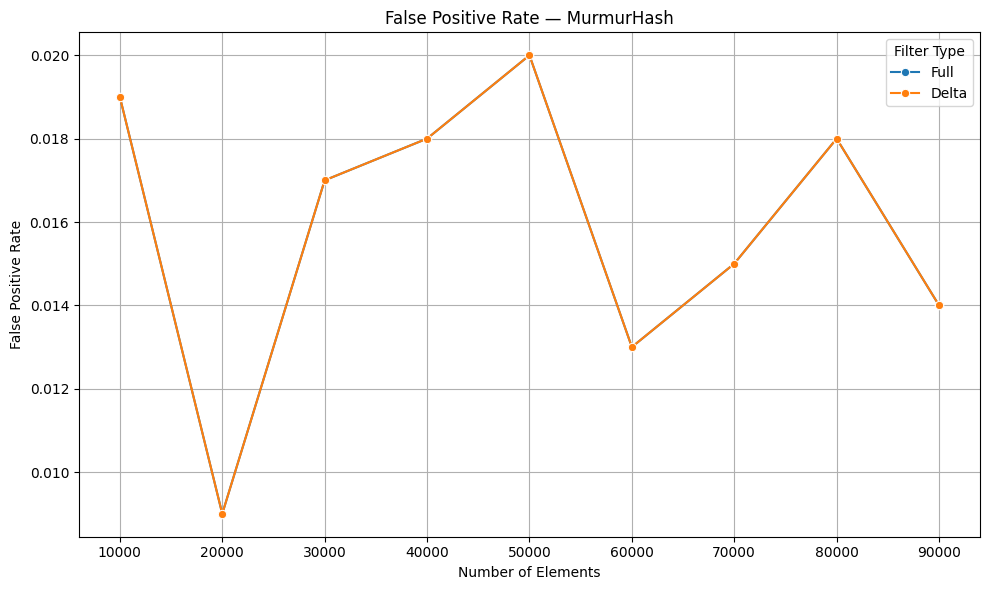

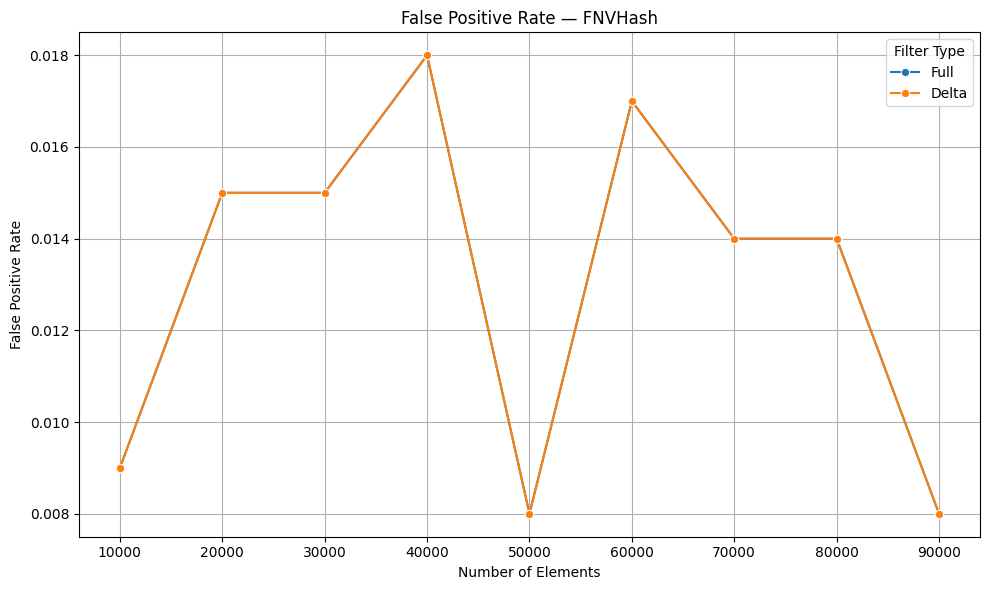

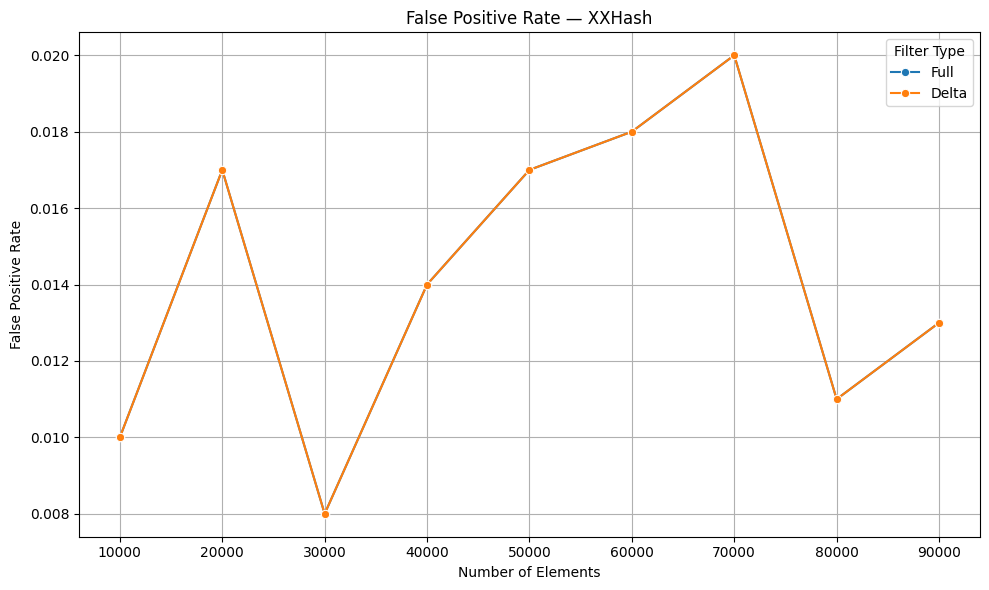

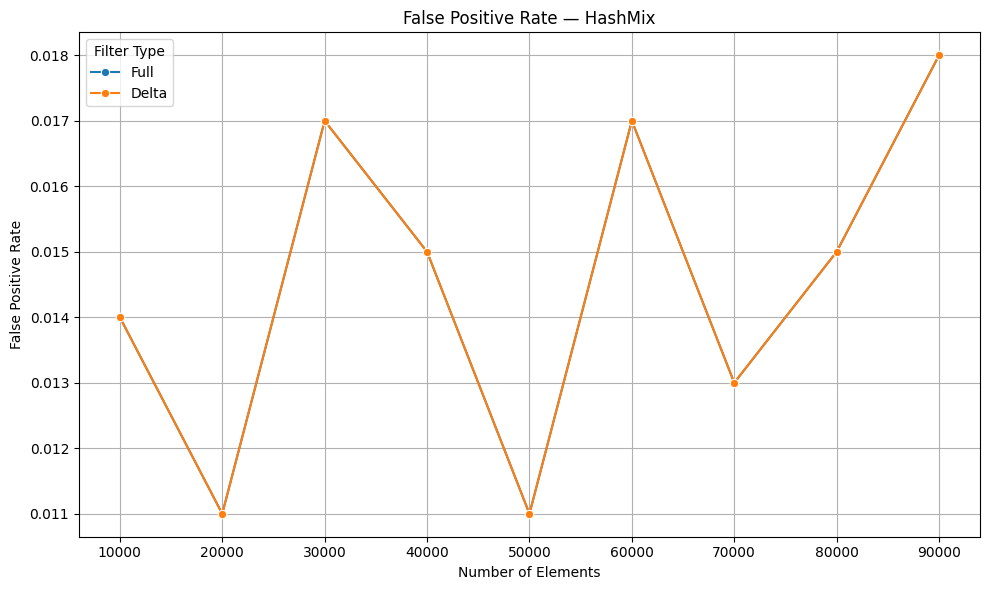

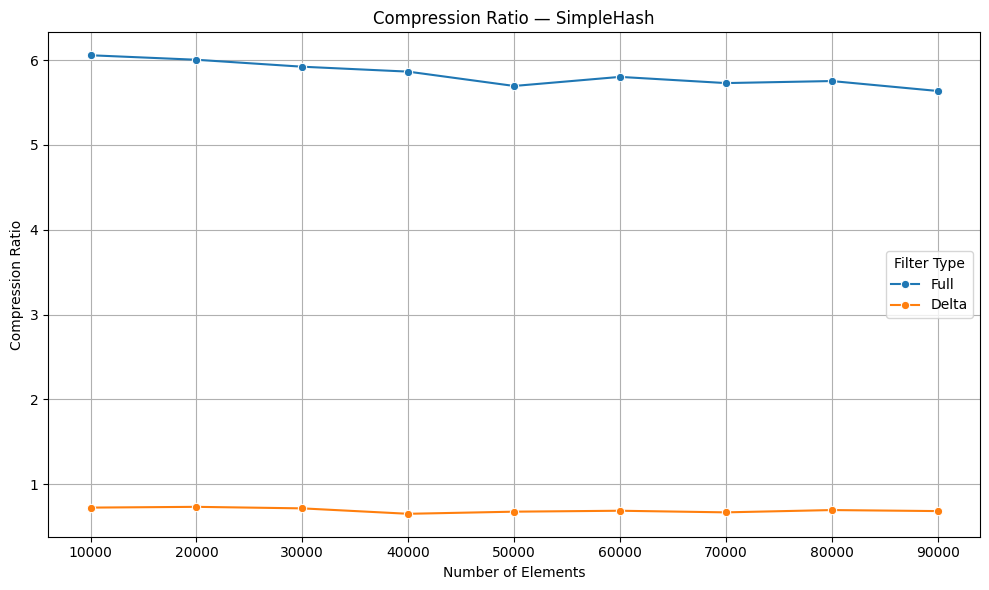

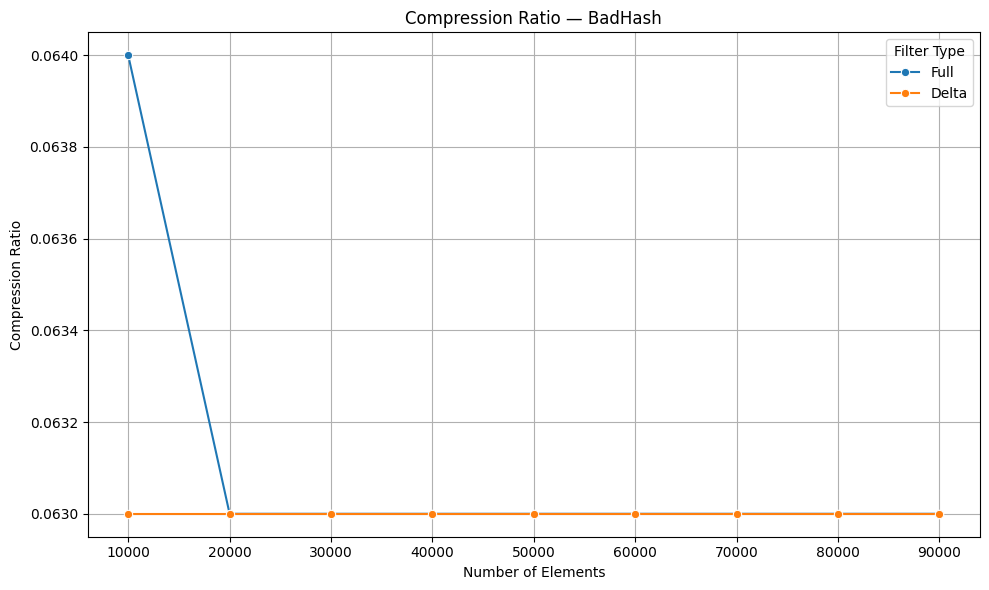

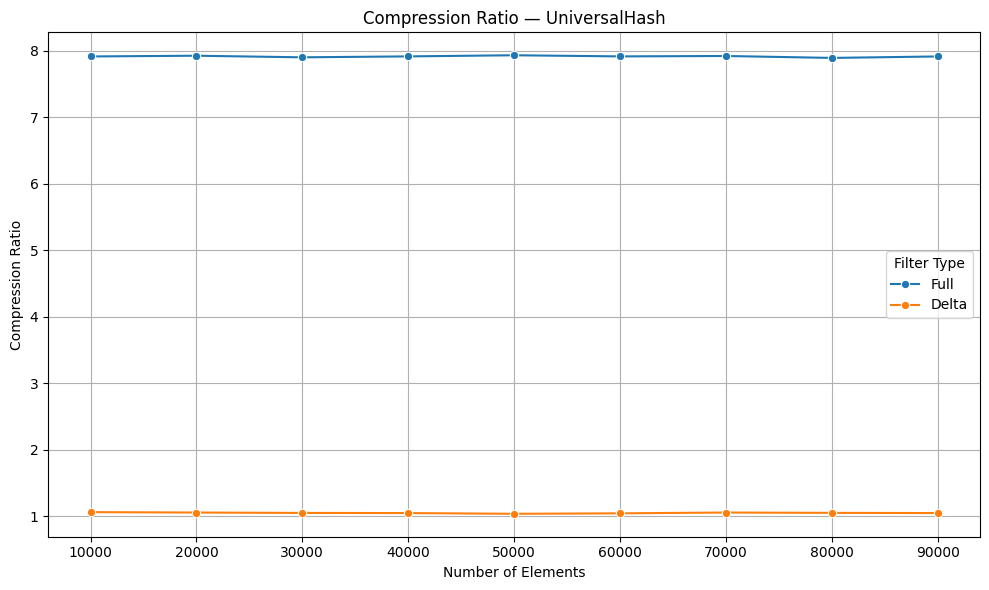

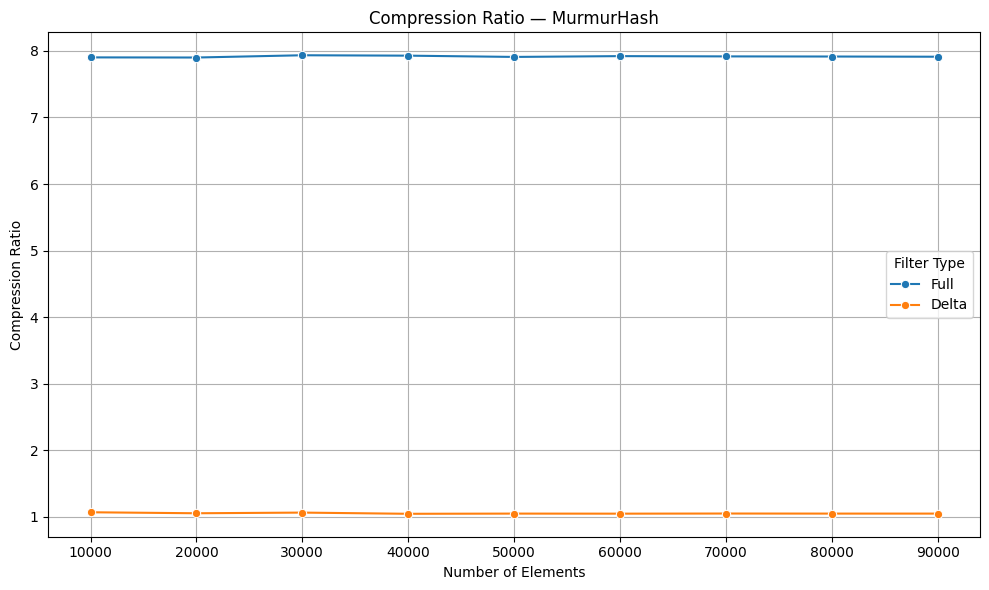

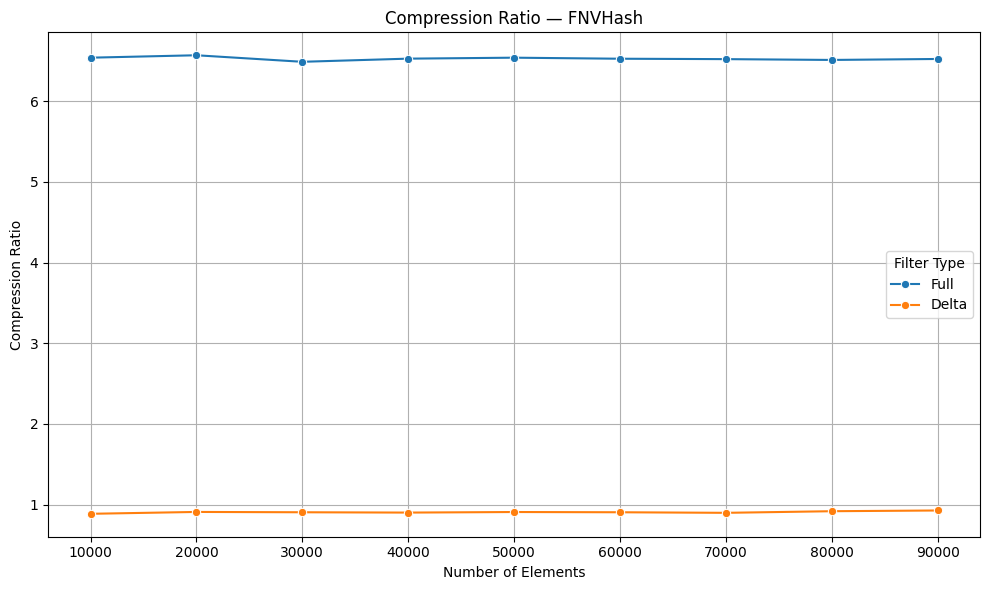

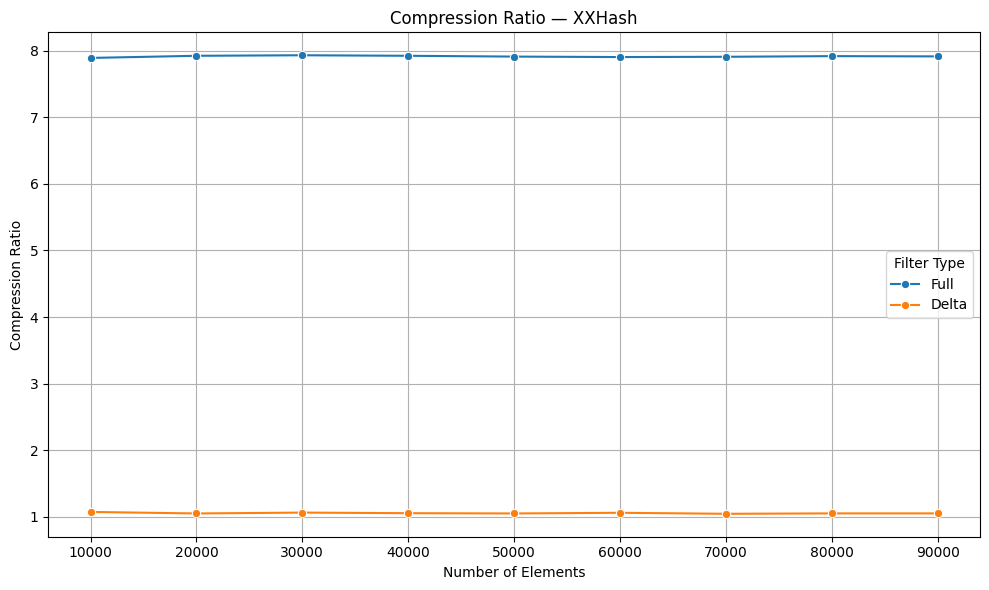

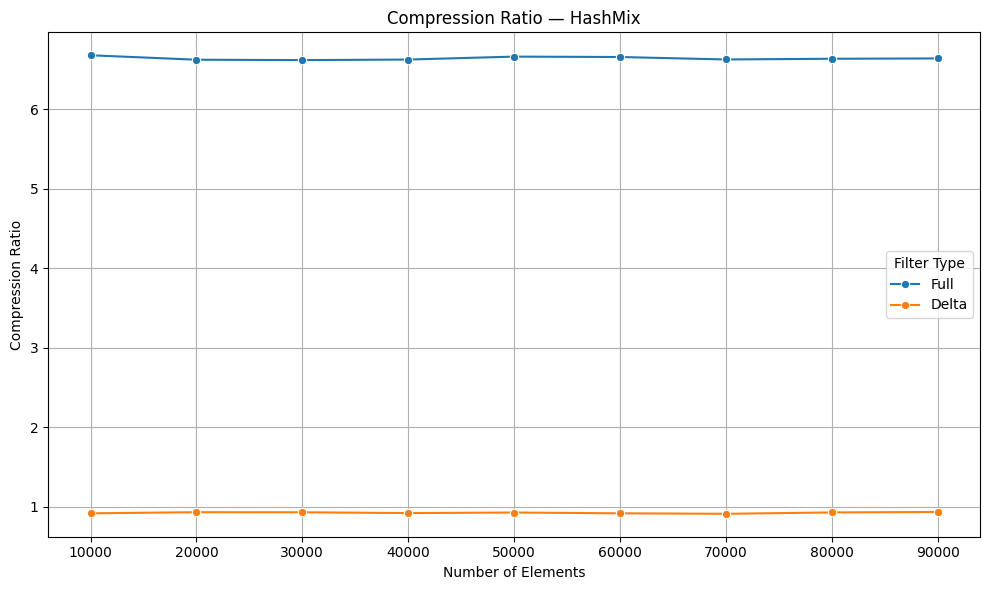

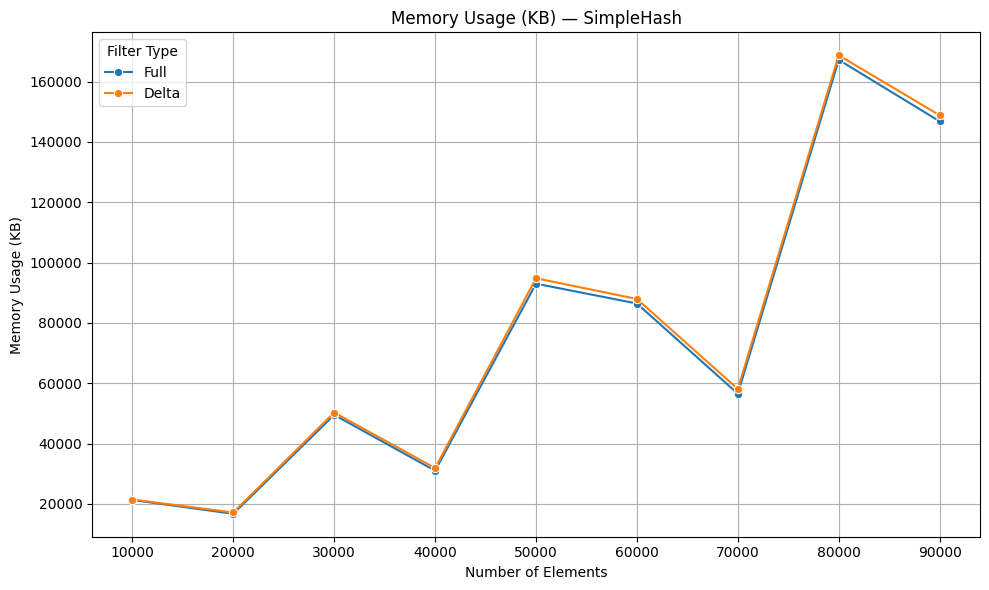

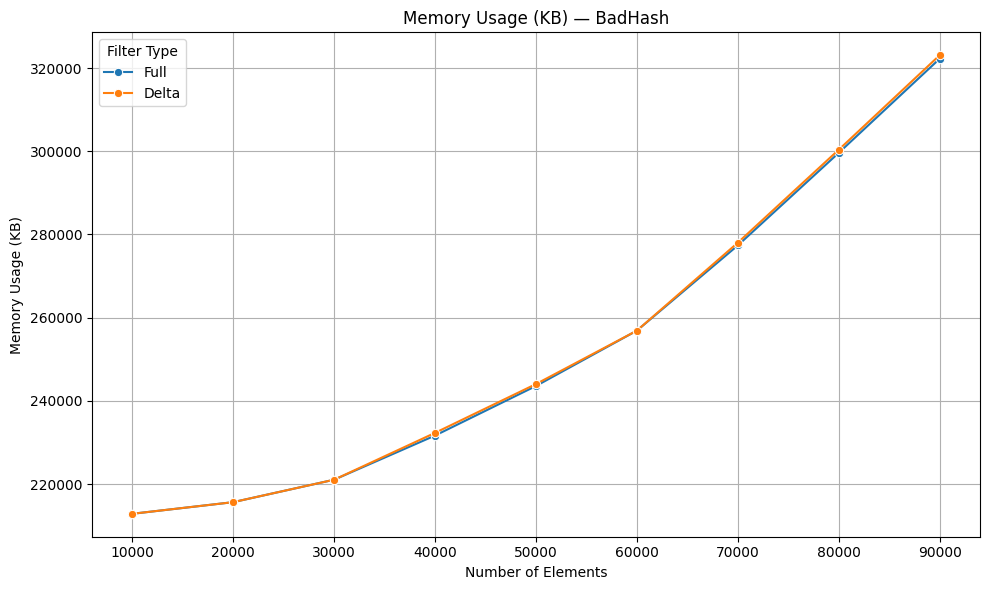

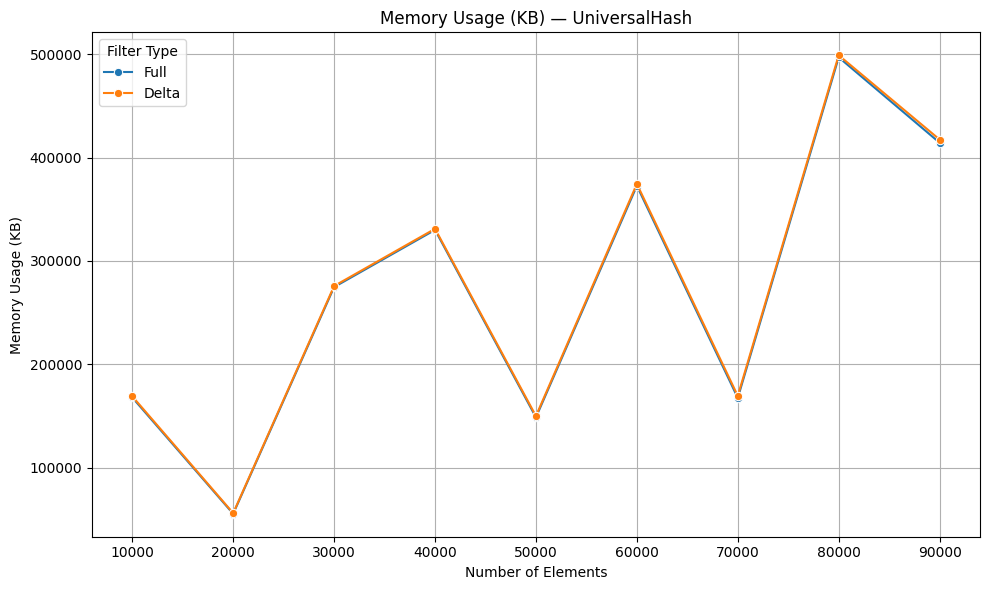

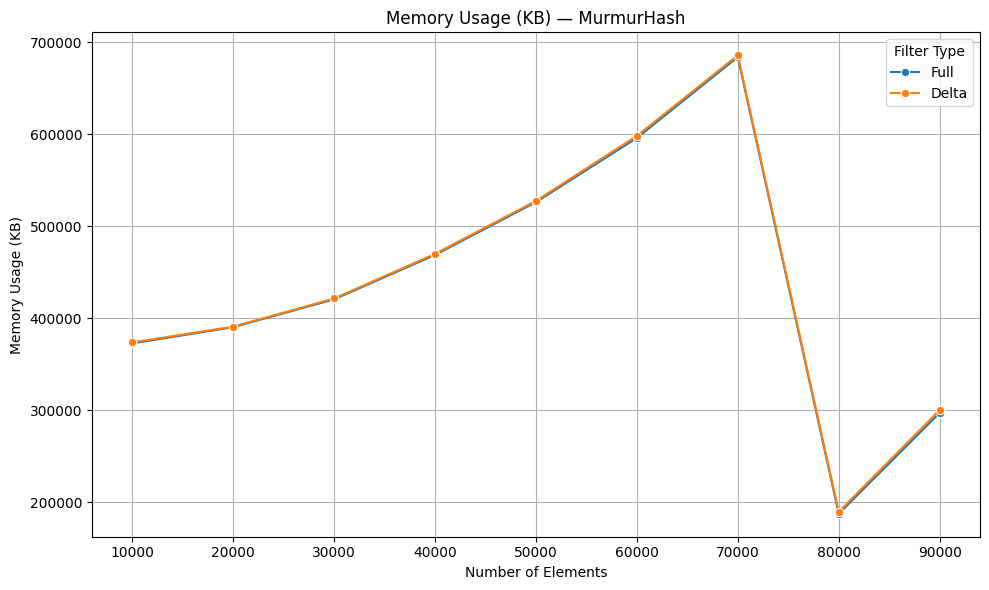

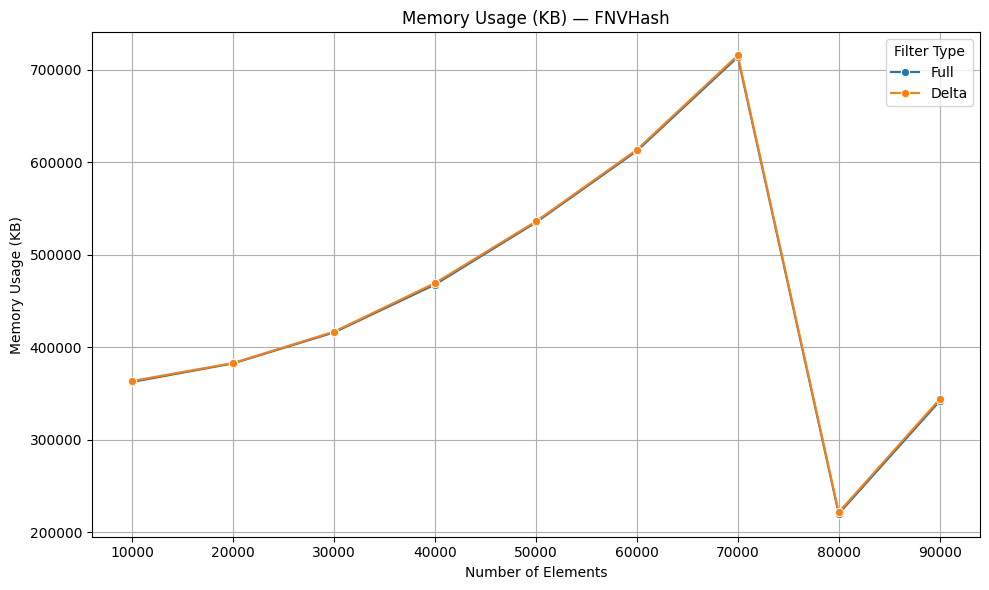

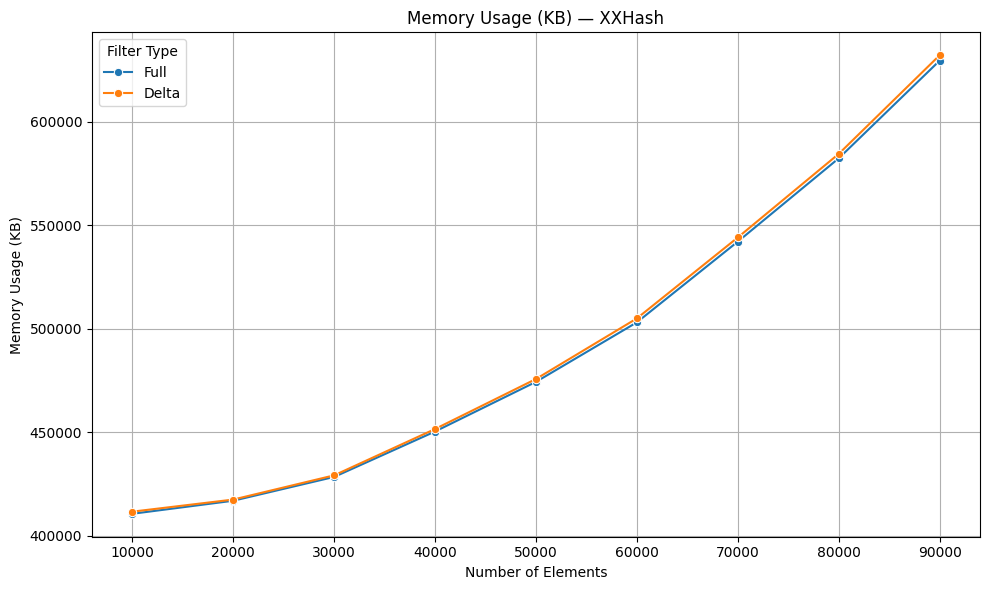

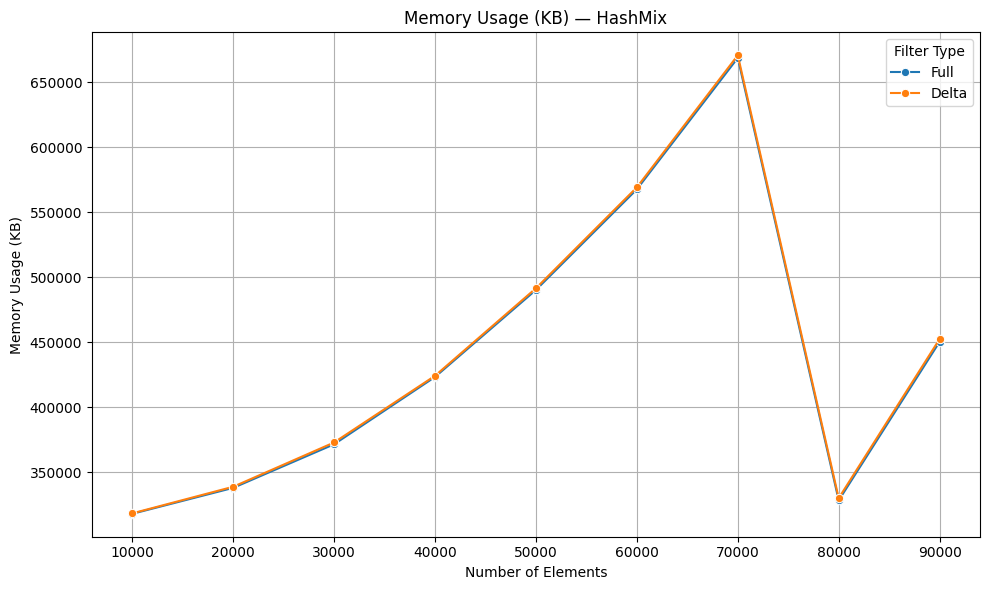

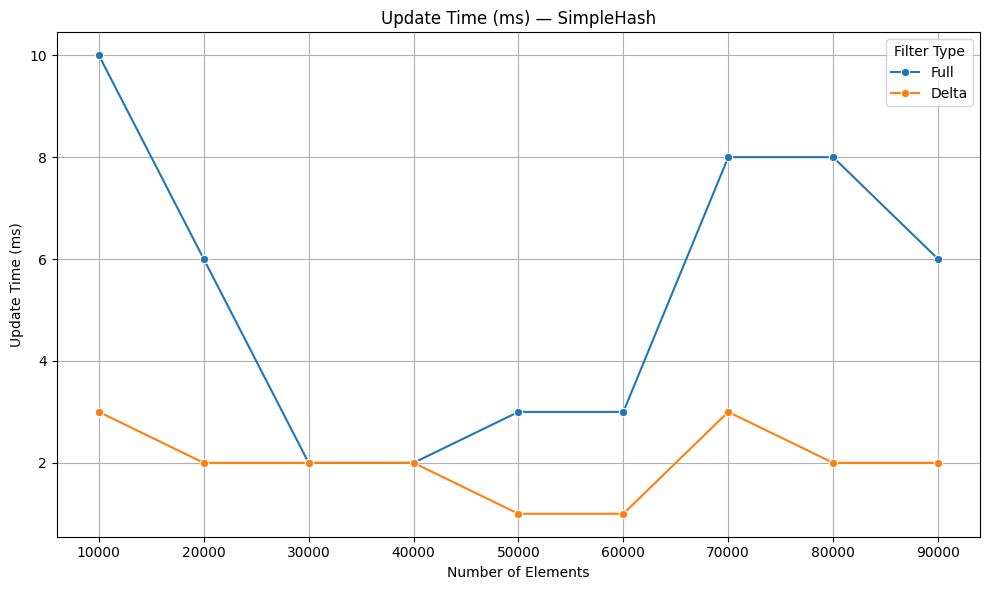

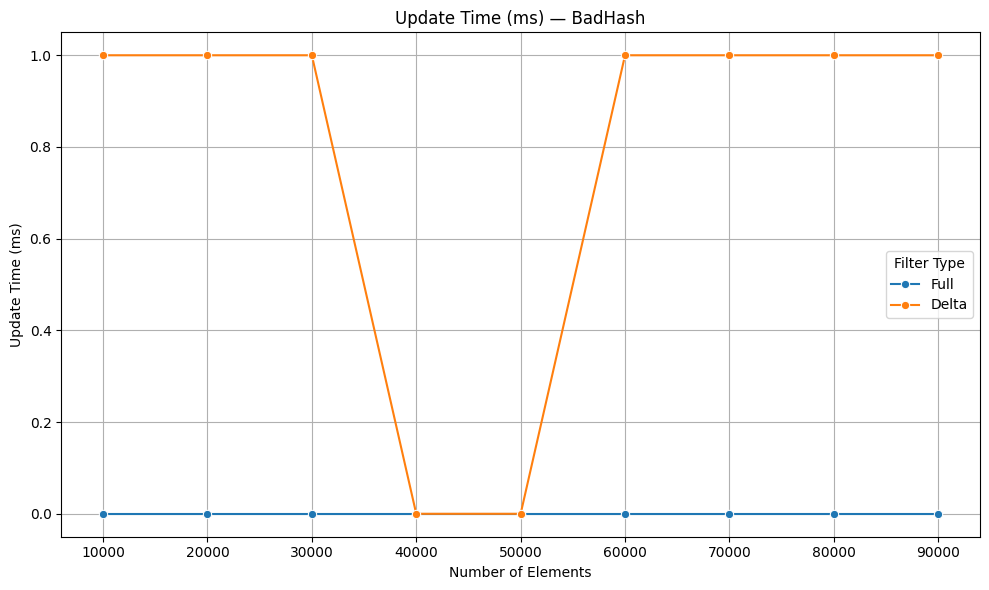

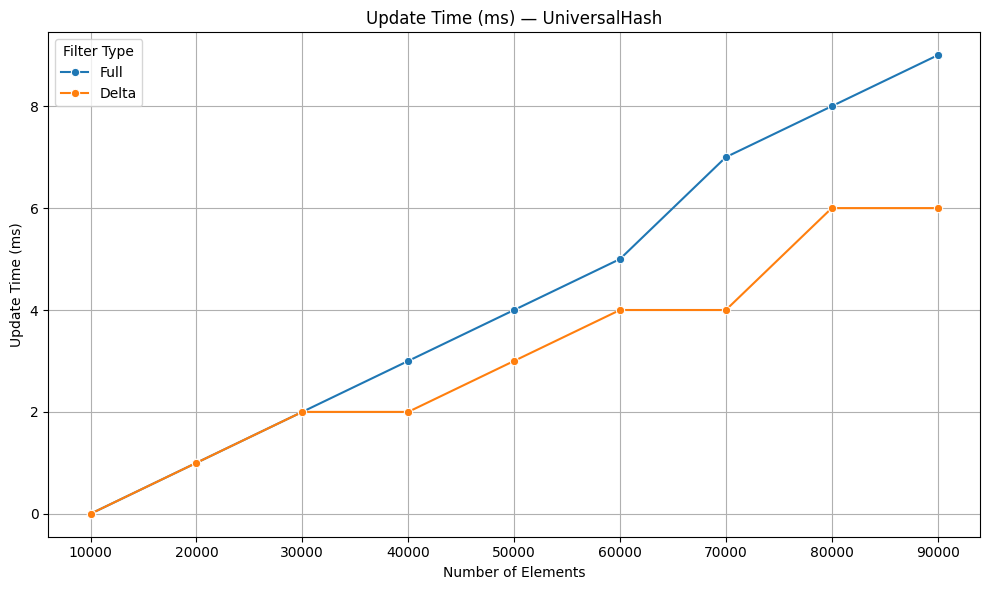

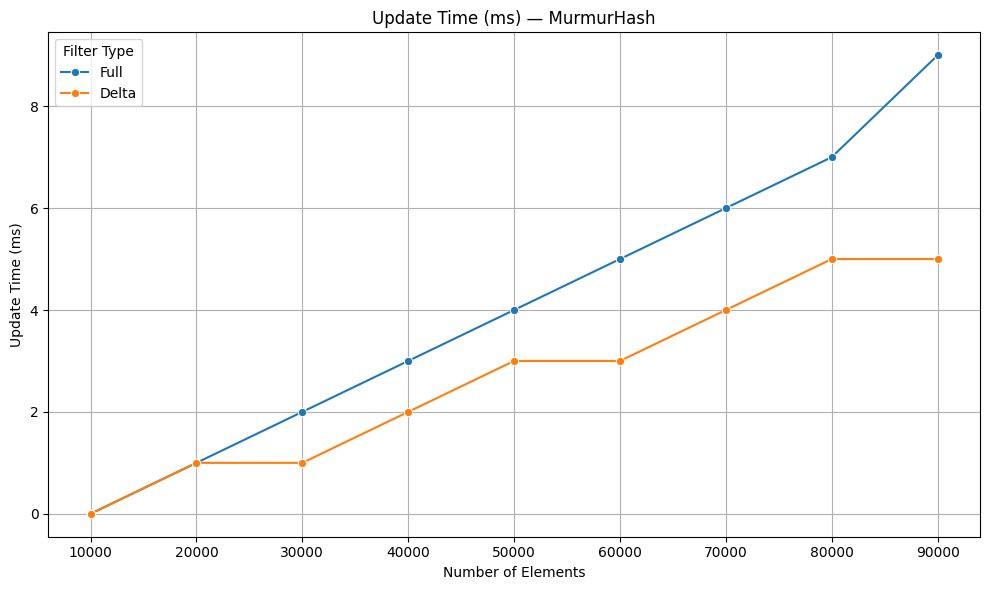

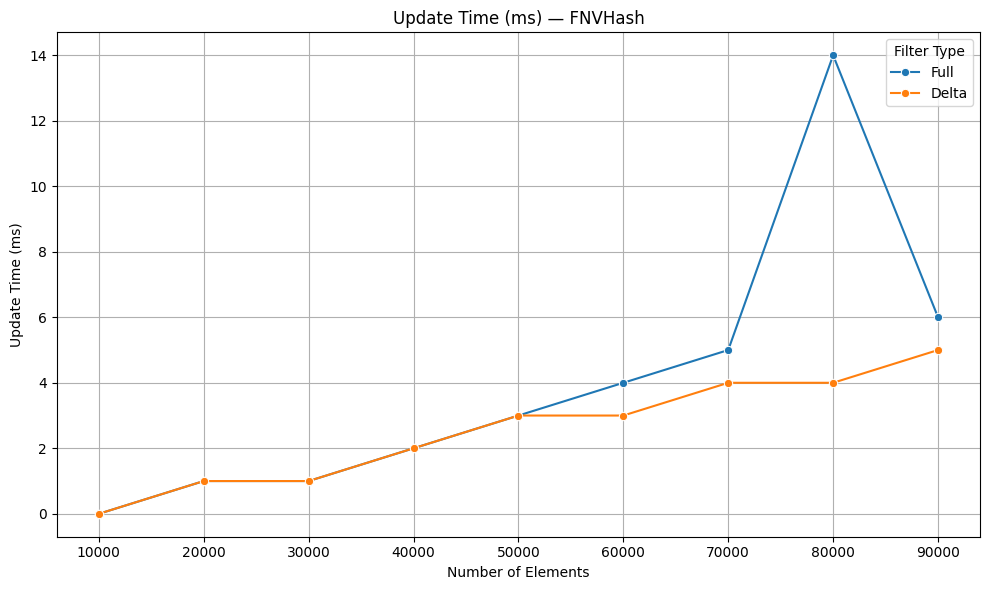

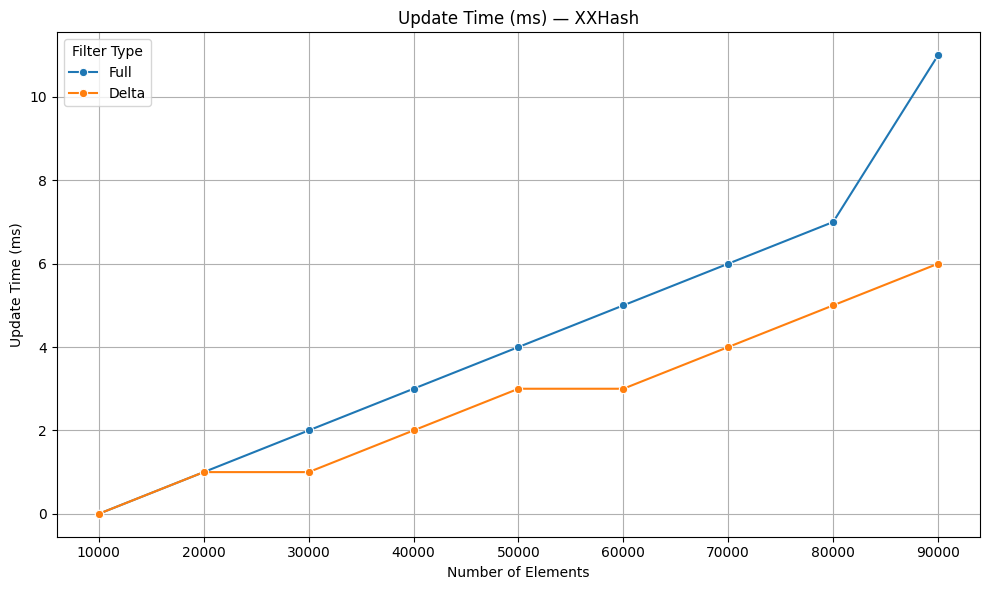

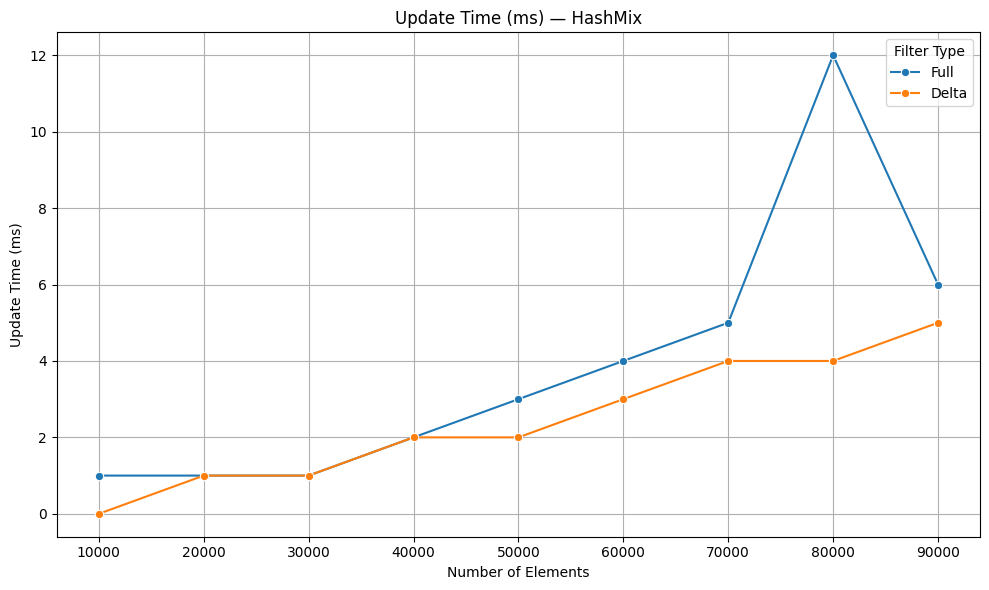

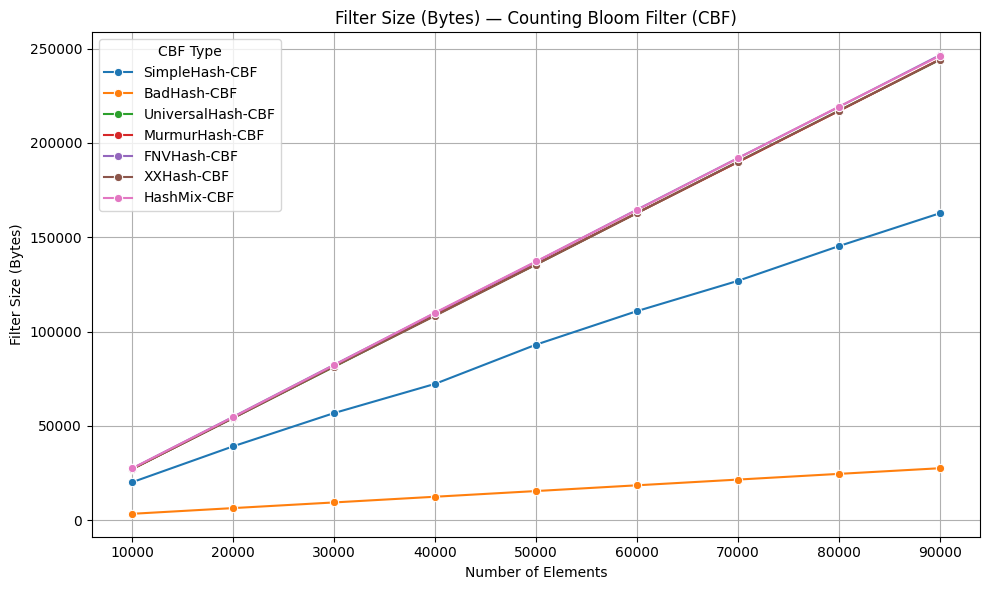

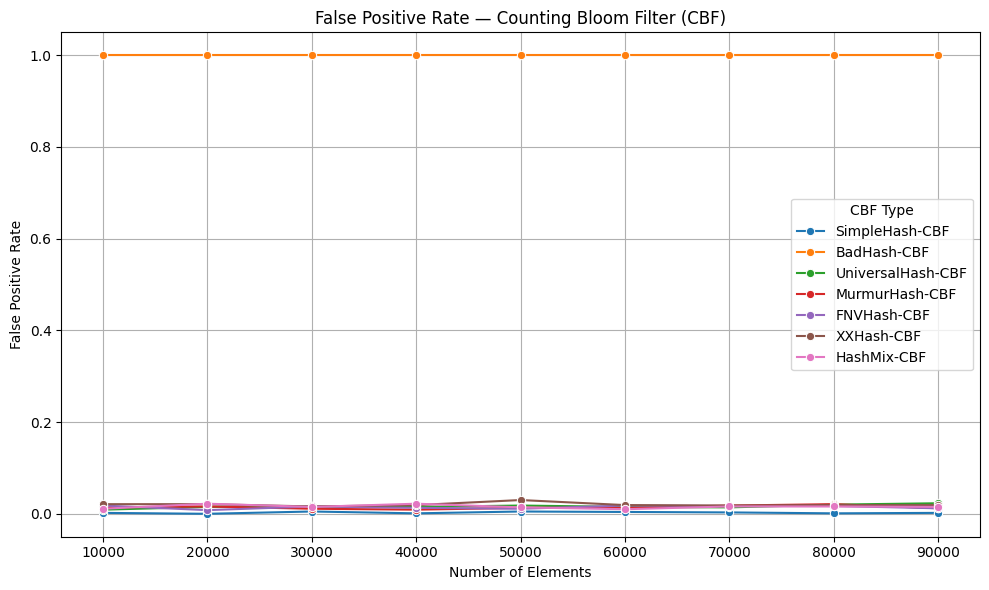

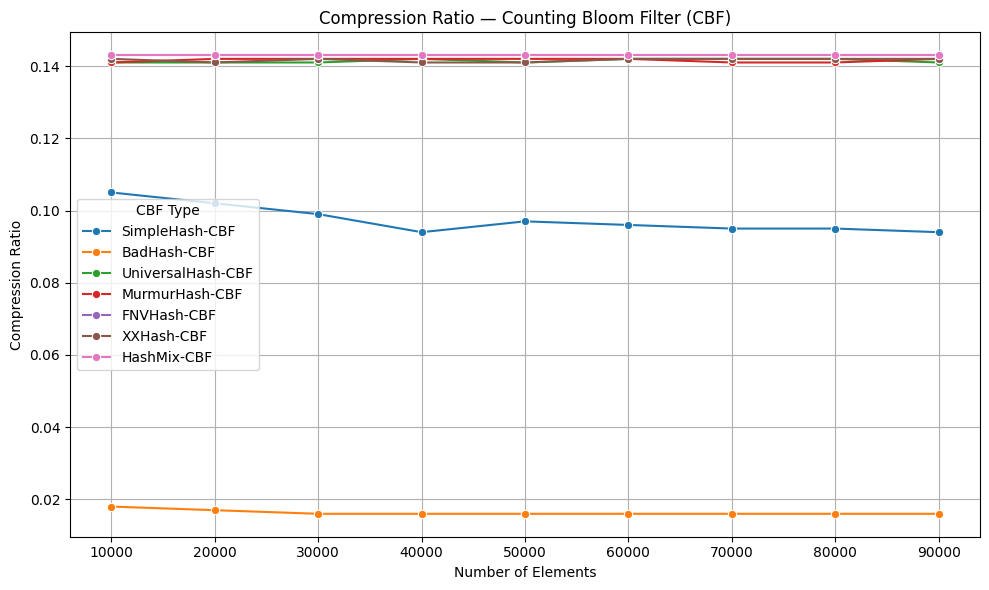

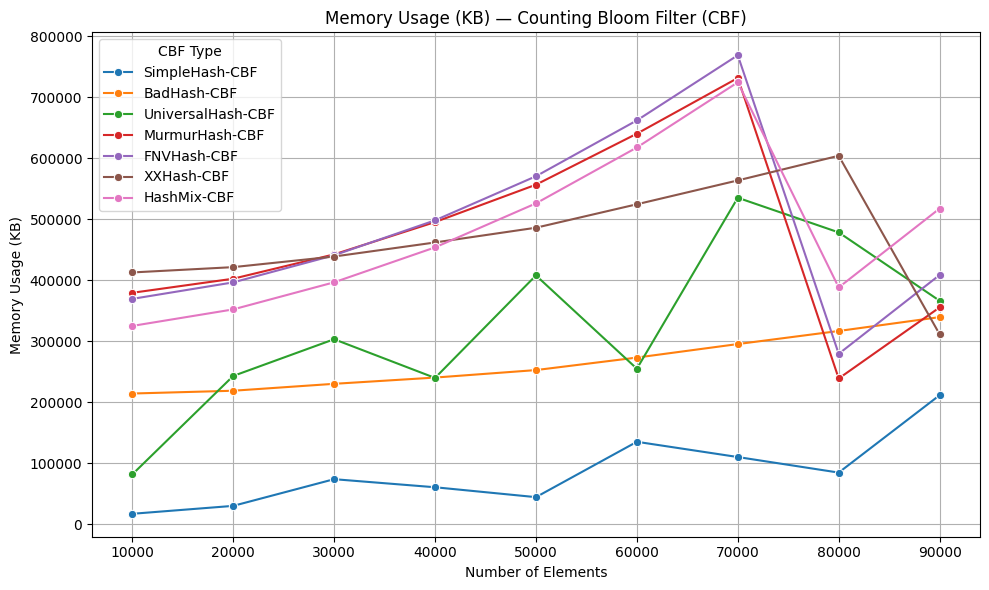

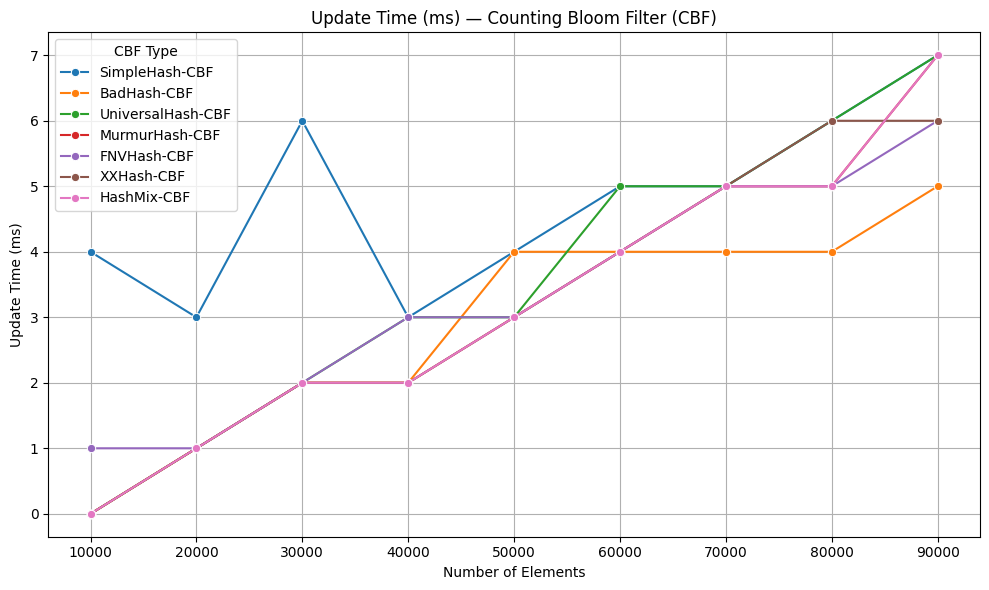

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("benchmark_results.csv")

df["HashFunction"] = df["FilterType"].str.extract(
    r"(SimpleHash|BadHash|UniversalHash|MurmurHash|FNVHash|XXHash|HashMix)"
)
df["Mode"] = df["FilterType"].str.extract(r"(Full|Delta)")

# Separate entries
cbf_df = df[df["FilterType"].str.contains("CBF", na=False)]
main_df = df[~df["FilterType"].str.contains("CBF", na=False)]

metrics = [
    ("Size(Bytes)", "Filter Size (Bytes)"),
    ("FalsePositiveRate", "False Positive Rate"),
    ("CompressionRatio", "Compression Ratio"),
    ("Memory(KB)", "Memory Usage (KB)"),
    ("Time(ms)", "Update Time (ms)")
]

# List of hash functions
hash_functions = ["SimpleHash", "BadHash", "UniversalHash", "MurmurHash", "FNVHash", "XXHash", "HashMix"]

# Main plots
for metric, ylabel in metrics:
    for h in hash_functions:
        plt.figure(figsize=(10, 6))
        subset = main_df[main_df["HashFunction"] == h]
        if subset.empty:
            continue
        sns.lineplot(data=subset, x="Elements", y=metric, hue="Mode", marker="o")
        plt.title(f"{ylabel} — {h}")
        plt.xlabel("Number of Elements")
        plt.ylabel(ylabel)
        plt.legend(title="Filter Type")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# CountingBF plot
if not cbf_df.empty:
    for metric, ylabel in metrics:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=cbf_df, x="Elements", y=metric, hue="FilterType", marker="o")
        plt.title(f"{ylabel} — Counting Bloom Filter (CBF)")
        plt.xlabel("Number of Elements")
        plt.ylabel(ylabel)
        plt.legend(title="CBF Type")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
